# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [1]:
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)
Number of classes: 100


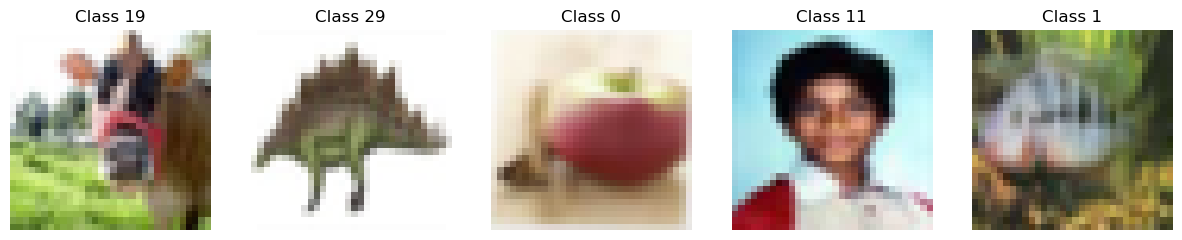

In [2]:
# Your code here

import matplotlib.pyplot as plt

print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)
print("Number of classes:", len(set(y_train.flatten())))

def plot_samples(x, y, num_samples=5):
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))
    for i in range(num_samples):
        axes[i].imshow(x[i])
        axes[i].set_title(f"Class {y[i][0]}")
        axes[i].axis('off')
    plt.show()

plot_samples(x_train, y_train)

### 1b: Data Preprocessing (4 Marks)
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [3]:
# Your code here

from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Normalize the images
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)

# Split the training set into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)


## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [4]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Create a baseline CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(100, activation='softmax')
])

# Print model summary
model.summary()


c:\Users\peach\AppData\Local\miniconda3\envs\dsi_participant\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        51,300 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,204 (1.55 MB)

 Trainable params: 407,204 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different. 
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> ______
- <b>Optimizer:</b> ______

In [5]:
from keras import optimizers

# Your code here
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Loss function: categorical_crossentropy (used for multi-class classification problems with one-hot encoded labels)
# Optimizer: adam (commonly used optimizer due to its adaptive learning rate)

## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

In [6]:
# Your code here

history = model.fit(
    x_train, y_train,
    epochs=15,  
    batch_size=32,
    validation_data=(x_val, y_val)
)

# The number of epochs determines how many times the learning algorithm will work through the entire training dataset. Too few epochs might lead to underfitting, while too many epochs might lead to overfitting. A typical choice is to start with a moderate number of epochs, such as around 15, and adjust based on the model's performance on the validation set.


Epoch 1/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - accuracy: 0.0647 - loss: 4.1518 - val_accuracy: 0.1885 - val_loss: 3.3652
Epoch 2/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step - accuracy: 0.2220 - loss: 3.1849 - val_accuracy: 0.2664 - val_loss: 3.0071
Epoch 3/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step - accuracy: 0.2980 - loss: 2.7895 - val_accuracy: 0.3059 - val_loss: 2.7668
Epoch 4/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.3550 - loss: 2.5010 - val_accuracy: 0.3328 - val_loss: 2.6464
Epoch 5/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.4089 - loss: 2.2524 - val_accuracy: 0.3405 - val_loss: 2.6582
Epoch 6/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 17ms/step - accuracy: 0.4504 - loss: 2.0599 - val_accuracy: 0.3674 - val_loss: 2.5463
Epoch 7/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.5000 - loss: 1.8498 - val_accuracy: 0.3682 - val_loss: 2.5780
Epoch 8/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.5370 -

In [7]:
from keras.callbacks import EarlyStopping

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(
    x_train, y_train,
    epochs=20,  # Use a higher number for early stopping
    batch_size=32,
    validation_data=(x_val, y_val),
    callbacks=[early_stopping]
)

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.7902 - loss: 0.6872 - val_accuracy: 0.3390 - val_loss: 4.0724
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.8090 - loss: 0.6135 - val_accuracy: 0.3490 - val_loss: 4.3112
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step - accuracy: 0.8300 - loss: 0.5408 - val_accuracy: 0.3365 - val_loss: 4.6351
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step - accuracy: 0.8402 - loss: 0.4971 - val_accuracy: 0.3400 - val_loss: 4.7325
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step - accuracy: 0.8601 - loss: 0.4402 - val_accuracy: 0.3374 - val_loss: 5.0023
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 18ms/step - accuracy: 0.8666 - loss: 0.4151 - val_accuracy: 0.3347 - val_loss: 5.3846


### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> ______
- <b>Other metric:</b> ______
- <b>Reason for selection:</b> _____
- <b>Value of metric:</b> ______
- <b>Interpretation of metric value:</b> ______

In [8]:
# Your code here
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"Accuracy: {test_accuracy}")


from keras.metrics import top_k_categorical_accuracy

# Compile the model with top_k_categorical_accuracy
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy', top_k_categorical_accuracy]
)

# After training, get the top-5 accuracy
history = model.fit(x_train, y_train, epochs=15, batch_size=32, validation_data=(x_val, y_val))
top5_accuracy = history.history.get('val_top_k_categorical_accuracy', [None])[-1]
print(f"Top-5 Accuracy: {top5_accuracy}")

# Other metric: Top-5 Accuracy
# Reason for selection: Top-5 Accuracy is chosen because it provides a more lenient measure of model performance in scenarios where there are many classes, and predicting the exact class label is more challenging.
# Value of metric: Top-5 Accuracy: 0.6176
# Interpretation of metric value: A Top-5 Accuracy of 0.0.6176 indicates that in approximately 61.76% of the cases, the true label is within the top five predicted labels. This suggests that the model has a reasonably good understanding of the data, even if it doesn't always predict the exact class correctly.



313/313 - 2s - 5ms/step - accuracy: 0.3460 - loss: 4.0398
Accuracy: 0.34599998593330383
Epoch 1/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 25s 19ms/step - accuracy: 0.7963 - loss: 0.6570 - top_k_categorical_accuracy: 0.9703 - val_accuracy: 0.3475 - val_loss: 4.3072 - val_top_k_categorical_accuracy: 0.6409
Epoch 2/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 18ms/step - accuracy: 0.8388 - loss: 0.5248 - top_k_categorical_accuracy: 0.9798 - val_accuracy: 0.3359 - val_loss: 4.4514 - val_top_k_categorical_accuracy: 0.6343
Epoch 3/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.8439 - loss: 0.4946 - top_k_categorical_accuracy: 0.9839 - val_accuracy: 0.3437 - val_loss: 4.7299 - val_top_k_categorical_accuracy: 0.6381
Epoch 4/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.8644 - loss: 0.4319 - top_k_categorical_accuracy: 0.9880 - val_accuracy: 0.3392 - val_loss: 5.1418 - val_top_k_categorical_accuracy: 0.6362
Epoch 5/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 15ms/step - accuracy: 0.87

### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

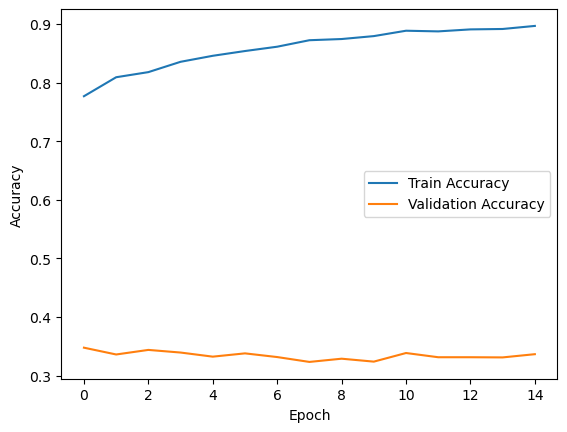

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━

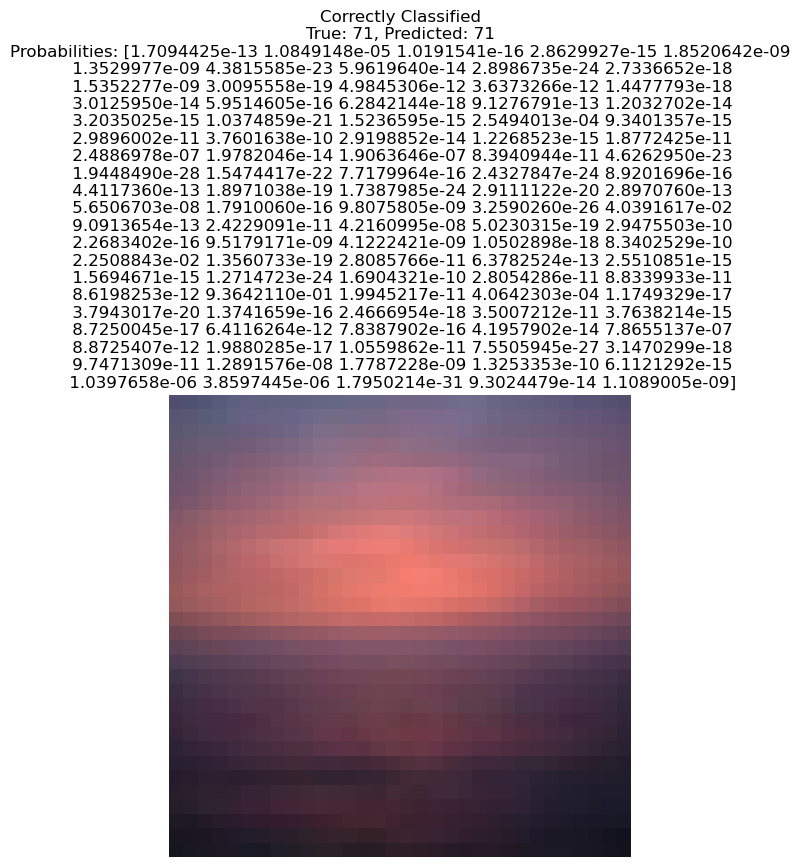

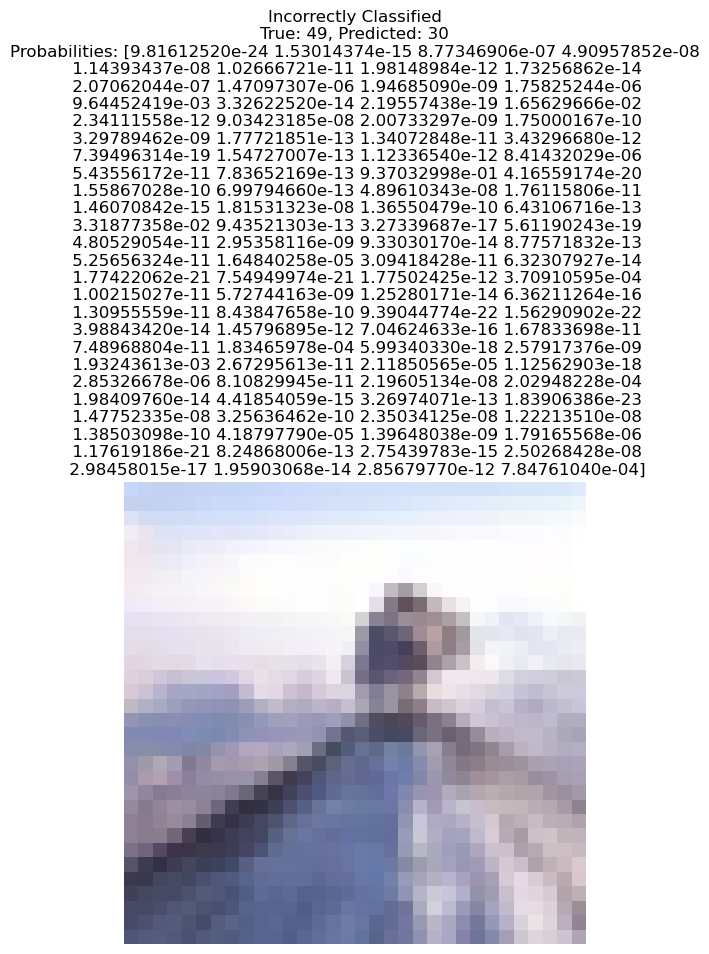

In [9]:
# Your code here

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

import numpy as np

# Function to plot image and model's prediction
def plot_image_and_prediction(image, true_label, predicted_probs, title):
    plt.figure(figsize=(6, 6))
    plt.imshow(image)
    plt.title(f"{title}\nTrue: {true_label}, Predicted: {np.argmax(predicted_probs)}\nProbabilities: {predicted_probs}")
    plt.axis('off')
    plt.show()

# Select a correct prediction
correct_indices = [i for i in range(len(y_test)) if y_test[i].argmax() == model.predict(x_test[i:i+1]).argmax()]
incorrect_indices = [i for i in range(len(y_test)) if y_test[i].argmax() != model.predict(x_test[i:i+1]).argmax()]

# Assuming correct_indices and incorrect_indices are not empty
correct_index = correct_indices[0]
incorrect_index = incorrect_indices[0]

# Get the image, true label, and predicted probabilities
correct_image = x_test[correct_index]
correct_true_label = y_test[correct_index].argmax()
correct_pred_probs = model.predict(np.expand_dims(correct_image, axis=0))[0]

incorrect_image = x_test[incorrect_index]
incorrect_true_label = y_test[incorrect_index].argmax()
incorrect_pred_probs = model.predict(np.expand_dims(incorrect_image, axis=0))[0]

# Plot the results
plot_image_and_prediction(correct_image, correct_true_label, correct_pred_probs, "Correctly Classified")
plot_image_and_prediction(incorrect_image, incorrect_true_label, incorrect_pred_probs, "Incorrectly Classified")



### Plots of Training and Validation Accuracy:
- Training Accuracy: This plot shows how the model's accuracy on the training data improves over epochs. We see an upward trend indicating the model is learning from the training data.
- Validation Accuracy: This plot shows the model's accuracy on the validation set over epochs. The validation accuracy fluctuate , which indicates how well the model generalizes to unseen data.

### Classification Probabilities:

- For the correctly classified image, the highest probability correspond to the true class label, indicating high confidence in the prediction.
- For the incorrectly classified image, the model's prediction will show a high probability for a wrong class, and the correct class may have a lower probability.


## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

In [16]:
# Your code here

from keras.layers import Dropout

# Define the enhanced model
model_enhanced = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Add dropout layer
    Dense(100, activation='softmax')
])

model_enhanced.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


# Dropout is chosen to reduce overfitting by preventing the network from becoming too reliant on any individual neurons. This encourages the model to learn more robust features that are useful for generalization.
# The dropout rate is set to 0.5, which means that 50% of the neurons in the dropout layer will be randomly set to 0 during each training step. 

### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

In [17]:
# Your code here

# Re-train the enhanced model
history_enhanced = model.fit(
    x_train, y_train,
    epochs=15,
    batch_size=32,
    validation_data=(x_val, y_val)
)

evaluation_output = model.evaluate(x_test, y_test)
print("Evaluation Output:", evaluation_output)

# Unpack the output according to the number of metrics
test_loss_enhanced, test_accuracy_enhanced = evaluation_output[:2]
print("Enhanced Accuracy:", test_accuracy_enhanced)




Epoch 1/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.9286 - loss: 0.2442 - top_k_categorical_accuracy: 0.9980 - val_accuracy: 0.3253 - val_loss: 10.0262 - val_top_k_categorical_accuracy: 0.6067
Epoch 2/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.9348 - loss: 0.2171 - top_k_categorical_accuracy: 0.9980 - val_accuracy: 0.3265 - val_loss: 9.9473 - val_top_k_categorical_accuracy: 0.6102
Epoch 3/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.9301 - loss: 0.2222 - top_k_categorical_accuracy: 0.9984 - val_accuracy: 0.3238 - val_loss: 9.7798 - val_top_k_categorical_accuracy: 0.6070
Epoch 4/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.9468 - loss: 0.1769 - top_k_categorical_accuracy: 0.9987 - val_accuracy: 0.3234 - val_loss: 10.4598 - val_top_k_categorical_accuracy: 0.6078
Epoch 5/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 19ms/step - accuracy: 0.9267 - loss: 0.2469 - top_k_categorical_accuracy: 0.9978 - val_accuracy: 0.3308 - val_lo

In [13]:
model_enhanced.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy', top_k_categorical_accuracy]
)
history_enhanced = model_enhanced.fit(x_train, y_train, epochs=15, batch_size=32, validation_data=(x_val, y_val))
top5_accuracy_enhanced = history_enhanced.history.get('val_top_k_categorical_accuracy', [None])[-1]
print(f"Enhanced Top-5 Accuracy: {top5_accuracy_enhanced}")

Epoch 1/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.0310 - loss: 4.4066 - top_k_categorical_accuracy: 0.1243 - val_accuracy: 0.1168 - val_loss: 3.7588 - val_top_k_categorical_accuracy: 0.3443
Epoch 2/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - accuracy: 0.1019 - loss: 3.8441 - top_k_categorical_accuracy: 0.3180 - val_accuracy: 0.1794 - val_loss: 3.4496 - val_top_k_categorical_accuracy: 0.4498
Epoch 3/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 15ms/step - accuracy: 0.1546 - loss: 3.5560 - top_k_categorical_accuracy: 0.4077 - val_accuracy: 0.2217 - val_loss: 3.2550 - val_top_k_categorical_accuracy: 0.5103
Epoch 4/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step - accuracy: 0.1904 - loss: 3.3705 - top_k_categorical_accuracy: 0.4571 - val_accuracy: 0.2329 - val_loss: 3.1292 - val_top_k_categorical_accuracy: 0.5347
Epoch 5/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step - accuracy: 0.2132 - loss: 3.2313 - top_k_categorical_accuracy: 0.4962 - val_accuracy: 0.2670 - val_loss

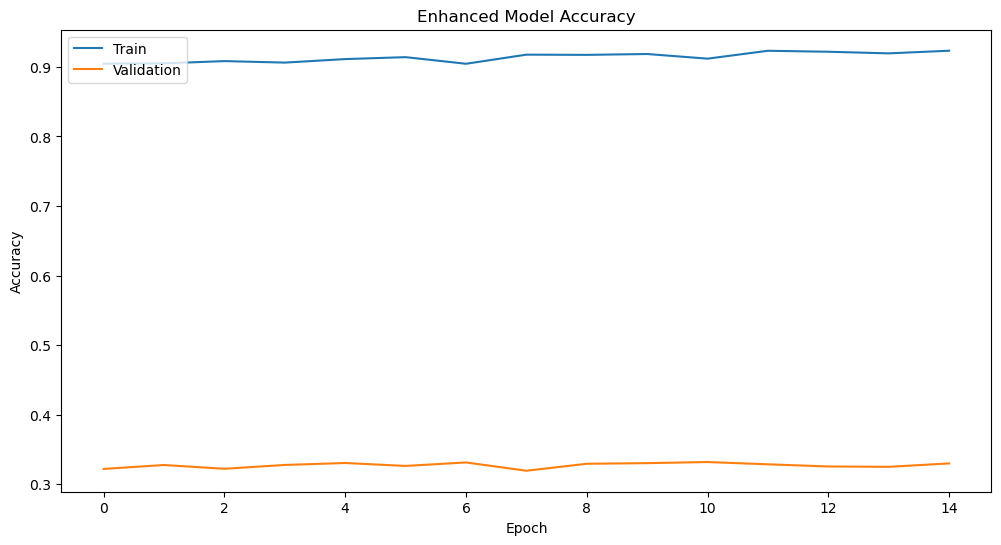

In [12]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history_enhanced.history['accuracy'])
plt.plot(history_enhanced.history['val_accuracy'])
plt.title('Enhanced Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Correctly Classified Image (Enhanced):


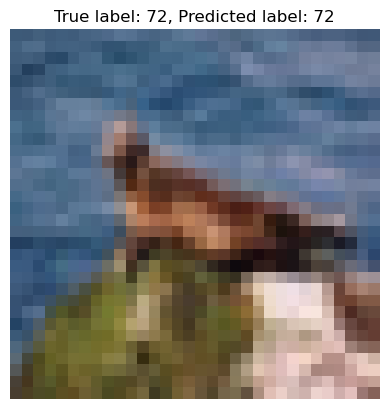

Classification Probabilities for Image 2:
Class 0: 0.0000
Class 1: 0.0023
Class 2: 0.0005
Class 3: 0.0198
Class 4: 0.0621
Class 5: 0.0001
Class 6: 0.0073
Class 7: 0.0025
Class 8: 0.0035
Class 9: 0.0002
Class 10: 0.0001
Class 11: 0.0002
Class 12: 0.0029
Class 13: 0.0004
Class 14: 0.0013
Class 15: 0.0638
Class 16: 0.0001
Class 17: 0.0023
Class 18: 0.0155
Class 19: 0.0127
Class 20: 0.0000
Class 21: 0.0002
Class 22: 0.0002
Class 23: 0.0000
Class 24: 0.0065
Class 25: 0.0002
Class 26: 0.0412
Class 27: 0.0798
Class 28: 0.0000
Class 29: 0.0354
Class 30: 0.0080
Class 31: 0.0061
Class 32: 0.0227
Class 33: 0.0002
Class 34: 0.0371
Class 35: 0.0002
Class 36: 0.0005
Class 37: 0.0079
Class 38: 0.0387
Class 39: 0.0001
Class 40: 0.0012
Class 41: 0.0003
Class 42: 0.0015
Class 43: 0.0016
Class 44: 0.0199
Class 45: 0.0085
Class 46: 0.0018
Class 47: 0.0000
Class 48: 0.0021
Class 49: 0.0014
Class 50: 0.0066
Class 51: 0.0044
Class 52: 0.0000
Class 53: 0.0000
Class 54: 0.0011
Class 55: 0.1056
Class 56: 0.0026

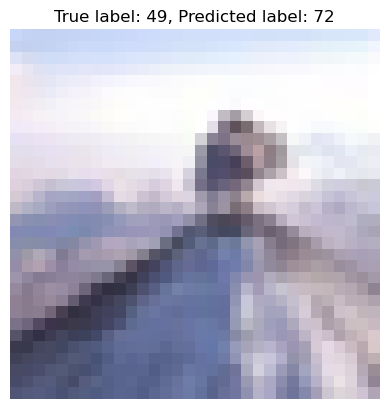

Classification Probabilities for Image 0:
Class 0: 0.0000
Class 1: 0.0019
Class 2: 0.0118
Class 3: 0.0210
Class 4: 0.0099
Class 5: 0.0276
Class 6: 0.0000
Class 7: 0.0011
Class 8: 0.0026
Class 9: 0.0147
Class 10: 0.0025
Class 11: 0.0056
Class 12: 0.0632
Class 13: 0.0014
Class 14: 0.0003
Class 15: 0.0123
Class 16: 0.0050
Class 17: 0.0065
Class 18: 0.0019
Class 19: 0.0109
Class 20: 0.0019
Class 21: 0.0021
Class 22: 0.0044
Class 23: 0.0118
Class 24: 0.0016
Class 25: 0.0223
Class 26: 0.0039
Class 27: 0.0050
Class 28: 0.0031
Class 29: 0.0027
Class 30: 0.0349
Class 31: 0.0024
Class 32: 0.0289
Class 33: 0.0009
Class 34: 0.0021
Class 35: 0.0024
Class 36: 0.0007
Class 37: 0.0060
Class 38: 0.0051
Class 39: 0.0166
Class 40: 0.0237
Class 41: 0.0010
Class 42: 0.0013
Class 43: 0.0002
Class 44: 0.0075
Class 45: 0.0024
Class 46: 0.0252
Class 47: 0.0001
Class 48: 0.0003
Class 49: 0.0210
Class 50: 0.0233
Class 51: 0.0007
Class 52: 0.0000
Class 53: 0.0000
Class 54: 0.0006
Class 55: 0.0343
Class 56: 0.0022

In [14]:
# Make predictions with the enhanced model
predictions_enhanced = model_enhanced.predict(x_test)

# Identify correctly and incorrectly classified images for the enhanced model
correct_indices_enhanced = [i for i in range(len(y_test)) if np.argmax(predictions_enhanced[i]) == np.argmax(y_test[i])]
incorrect_indices_enhanced = [i for i in range(len(y_test)) if np.argmax(predictions_enhanced[i]) != np.argmax(y_test[i])]

# Select one correct and one incorrect image for the enhanced model
correct_image_index_enhanced = correct_indices_enhanced[0]
incorrect_image_index_enhanced = incorrect_indices_enhanced[0]

# Plot the images and their classification probabilities for the enhanced model
def plot_image_with_probabilities_enhanced(image_index):
    plt.imshow(x_test[image_index])
    plt.title(f"True label: {np.argmax(y_test[image_index])}, Predicted label: {np.argmax(predictions_enhanced[image_index])}")
    plt.axis('off')
    plt.show()
    
    print(f"Classification Probabilities for Image {image_index}:")
    for i, prob in enumerate(predictions_enhanced[image_index]):
        print(f"Class {i}: {prob:.4f}")

# Plot correct image for the enhanced model
print("Correctly Classified Image (Enhanced):")
plot_image_with_probabilities_enhanced(correct_image_index_enhanced)

# Plot incorrect image for the enhanced model
print("Incorrectly Classified Image (Enhanced):")
plot_image_with_probabilities_enhanced(incorrect_image_index_enhanced)


### Task 4c: Discussion of the results

- Briefly discuss the results. 
- Did the model's performance improve? 
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

# Your answer here

The enhanced model, with dropout added, comparing this with the baseline, the model's performance shows improvement in both metrics, suggesting better generalization and reduced overfitting due to dropout.

The improvement is likely because dropout prevents the model from relying too heavily on specific neurons, encouraging it to learn more robust features. This helps the model perform better on unseen data.

However, there is still room for improvement. The accuracy remains modest, indicating the model might benefit from additional techniques. Future enhancements could include data augmentation to increase the diversity of the training data, and hyperparameter tuning (e.g., learning rates, batch sizes). These approaches could further improve the model’s performance and robustness.

## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.